<b>PREDICTING HOUSE PRICES</b>

It has more features and not enough data, Linear Regression without regularization should suffer from curse of dimensionality as there are many categorical variables as well and OneHotEncoding is something that we will be doing!

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',82)

data = pd.read_csv('data.csv')

print(data.shape,'\n')

data.head()

(1460, 81) 



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
X =data.copy()

In [4]:
X = X[X.columns.difference(['SalePrice'])]

In [5]:
y = data['SalePrice']
y.isna().sum()

0

<b>Feature description</b>

In [6]:
description = open('data_description.txt','r')
for i in description.readlines():
    print(i)

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

Remove variables with too many NA's:

In [7]:
def remove_vars_with_many_nas(df):
    
    nas = df.isnull().sum()/len(df) > 0.4
    
    drop_cols = nas[nas==True].index.tolist()
    
    df.drop(columns=drop_cols, inplace=True)
    
remove_vars_with_many_nas(X)

### Missing value analysis

In [8]:
X.loc[:,(X.isna().sum() > 0) == True].columns

Index(['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
       'Electrical', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'MasVnrType'],
      dtype='object')

<b>Key notes:</b>

1) LotFrontage missing values probably should not mean that there is not frontage, so we will impute by mean.

2) MasVnrType missing values probably should not mean that there is not frontage, so we will impute by mode. This is because masonry veneer is made for supporting the house and every house must have one.

2) MasVnrArea missing values probably should not mean that there is not frontage, so we will impute by mean. This is because masonry veneer is made for supporting the house and every house must have one.

3) BsmtQual and BsmtCond are both missing together which possibly means the houses dont have a basement in these cases.

4) 37 cases where BsmtExposure is missing with both BsmtQual and BsmtCond and 1 case where it is alone missing as it anyway means walkout or garden level walls. So cases where all three are missing need to be handled properly by creating a new category. The one case where it is missing when both others are there, we need to put that new type too. Also it is given in these Bsmt variables that NA means no basement. But BsmtFinSFtype1/2 and BsmtType1/2 needs to be handled with mean and mode.

5) Electrical system has to be there in every house so missing values here will be subsituted by mode.

5) NA in the garage variables have to subsituted by a new category except for GarageArea, here we will substitute by mean because its occurence is random.

6) When PoolArea = 0, it means the house doesnt have a Pool annd hence PoolQC there is zero!

<b>Imputing missing values</b>

Creating new categories in the respective variables with respect to the data description!

In [9]:
for i in X.columns:
    
    if i in ['BsmtQual', 'BsmtCond','BsmtExposure','PoolQC', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
        
        X[i].replace({np.nan:'Unavailabe'},inplace=True)

        print(X[i].unique())

['TA' 'Gd' 'Unavailabe' 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' 'Unavailabe']
['Gd' 'TA' 'Ex' 'Unavailabe' 'Fa']
['TA' 'Fa' 'Unavailabe' 'Gd' 'Po' 'Ex']
['RFn' 'Unf' 'Fin' 'Unavailabe']
['TA' 'Fa' 'Gd' 'Unavailabe' 'Ex' 'Po']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'Unavailabe' 'Basment' '2Types']


Checking if our code tampers with the data types of the variables

In [10]:
X.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

Mean-mode imputation for the rest of the features!

In [11]:
def impute_nas(df):
    
    remaining_nas = df.isna().sum() > 0
    
    remaining_nas = remaining_nas[remaining_nas == True].index.tolist()
    
    for i in remaining_nas:
        
        if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
            
            df.loc[df[i].isnull(),i] = np.round(df[i].mean(),0)
            
        elif df[i].dtype == 'O':
            
            df.loc[df[i].isnull(),i] = df[i].mode()[0]
            
        else:
            pass
        
    if df.isna().sum().any() == False:
        
        print('Done!')    
        
impute_nas(X)

Done!


<b>EDA</b>

In [12]:
def get_summary(df):
    
    for i in df.columns[1:]:

        if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
            print(i)
            print('Maximum :',df[i].max())
            print('Minimum :', df[i].min())
            print('Mean :',df[i].mean())
            print('Median :',df[i].median())
            print('Mode :',df[i].mode()[0])
            print('\n')

        else:
            print(df[i].value_counts())
            print('\n')
            
get_summary(data)

MSSubClass
Maximum : 190
Minimum : 20
Mean : 56.897260273972606
Median : 50.0
Mode : 20


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


LotFrontage
Maximum : 313.0
Minimum : 21.0
Mean : 70.04995836802665
Median : 69.0
Mode : 60.0


LotArea
Maximum : 215245
Minimum : 1300
Mean : 10516.828082191782
Median : 9478.5
Mode : 7200


Pave    1454
Grvl       6
Name: Street, dtype: int64


Grvl    50
Pave    41
Name: Alley, dtype: int64


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     7

Checking the distribution of the target variable

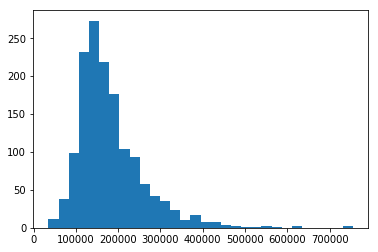

In [13]:
plt.hist(y,bins=30)
plt.show()

Checking the distribution of the categorical and numeric features!

Histogram of : 2ndFlrSF


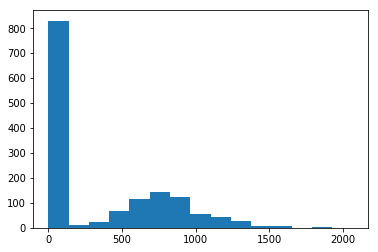

Histogram of : 3SsnPorch


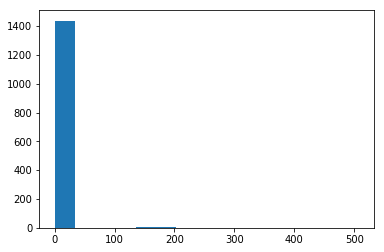

Histogram of : BedroomAbvGr


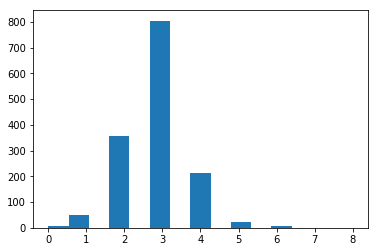

Bar graph of : BldgType


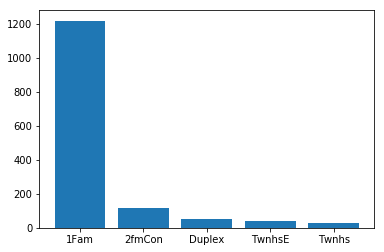

Bar graph of : BsmtCond


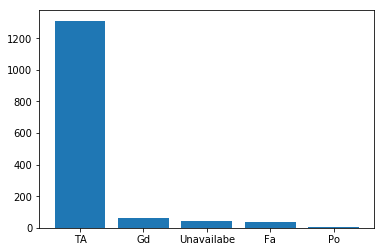

Bar graph of : BsmtExposure


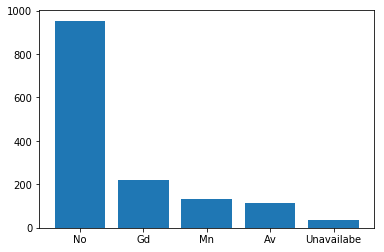

Histogram of : BsmtFinSF1


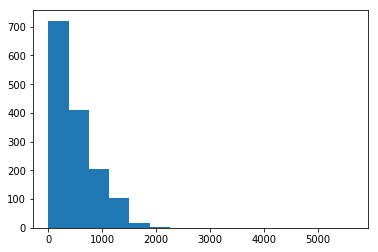

Histogram of : BsmtFinSF2


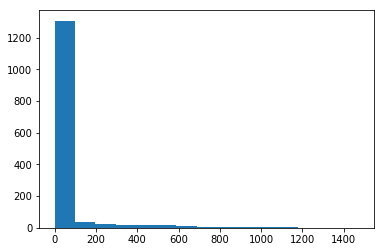

Bar graph of : BsmtFinType1


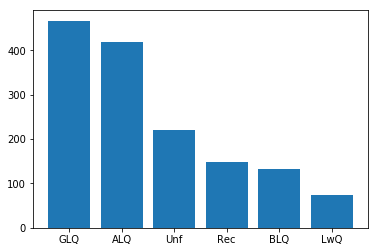

Bar graph of : BsmtFinType2


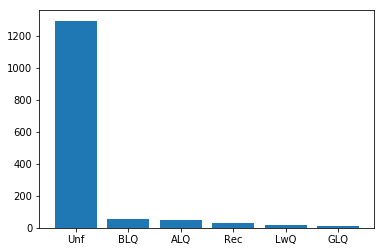

Histogram of : BsmtFullBath


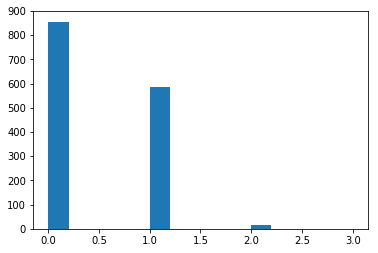

Histogram of : BsmtHalfBath


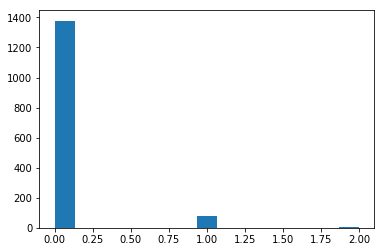

Bar graph of : BsmtQual


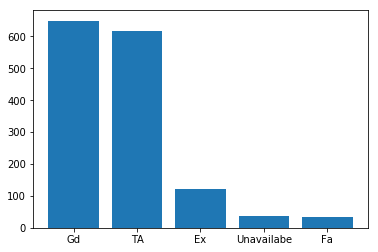

Histogram of : BsmtUnfSF


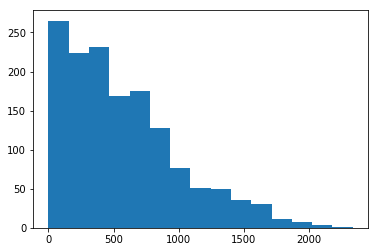

Bar graph of : CentralAir


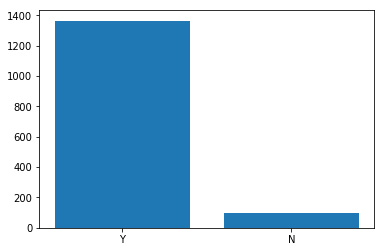

Bar graph of : Condition1


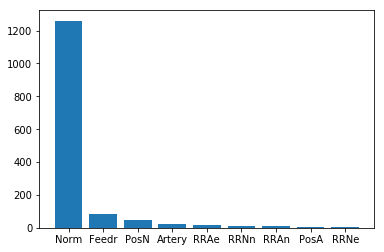

Bar graph of : Condition2


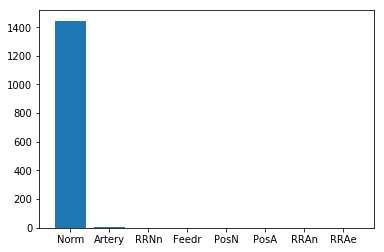

Bar graph of : Electrical


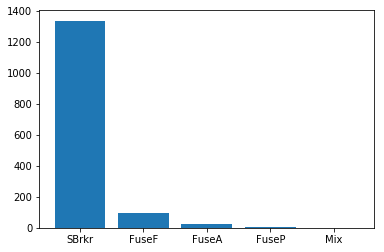

Histogram of : EnclosedPorch


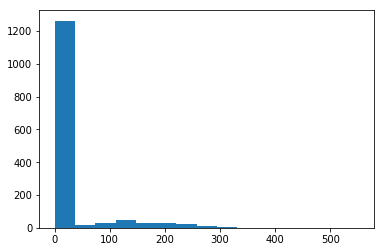

Bar graph of : ExterCond


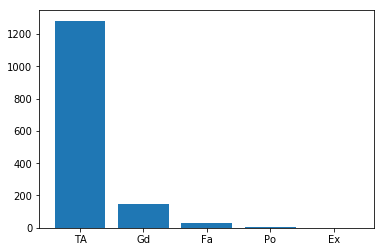

Bar graph of : ExterQual


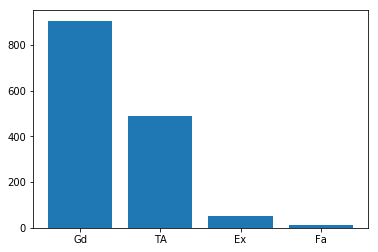

Bar graph of : Exterior1st


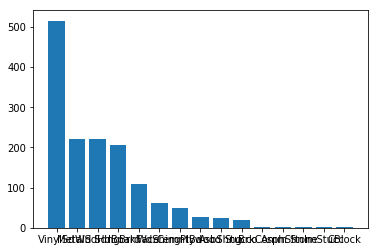

Bar graph of : Exterior2nd


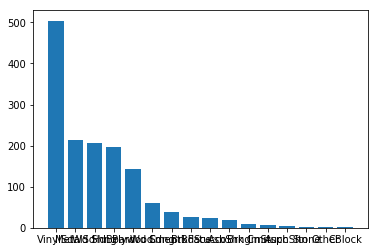

Histogram of : Fireplaces


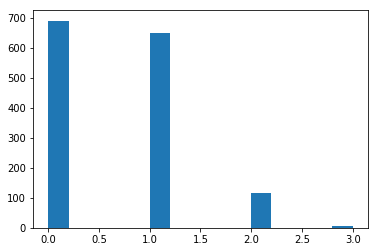

Bar graph of : Foundation


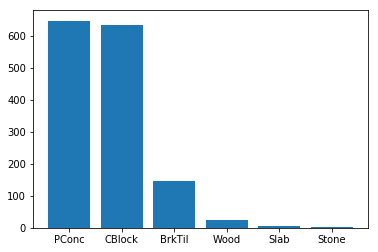

Histogram of : FullBath


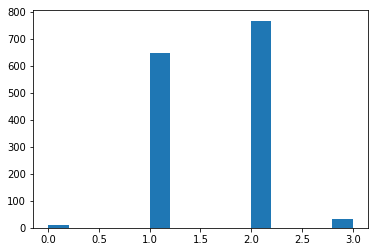

Bar graph of : Functional


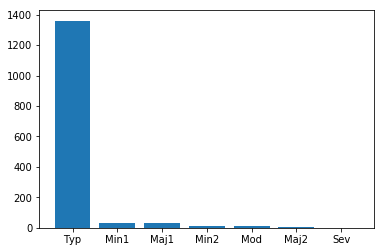

Histogram of : GarageArea


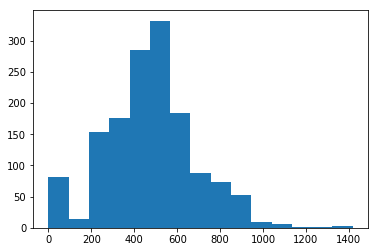

Histogram of : GarageCars


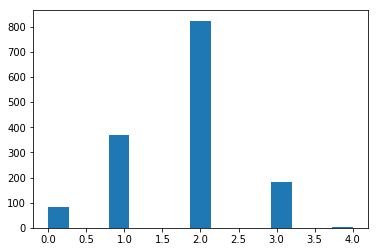

Bar graph of : GarageCond


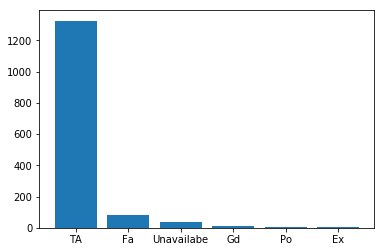

Bar graph of : GarageFinish


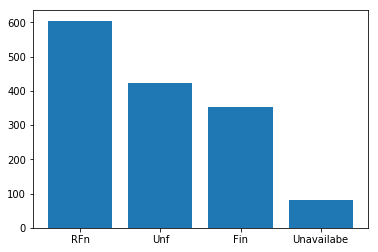

Bar graph of : GarageQual


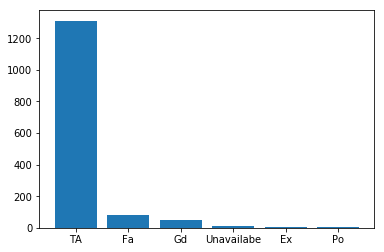

Bar graph of : GarageType


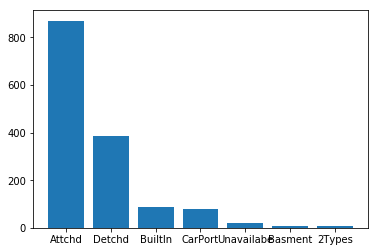

Histogram of : GarageYrBlt


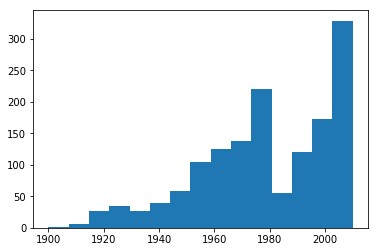

Histogram of : GrLivArea


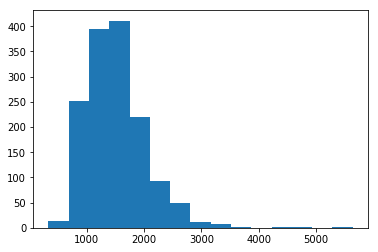

Histogram of : HalfBath


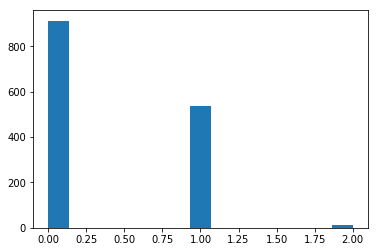

Bar graph of : Heating


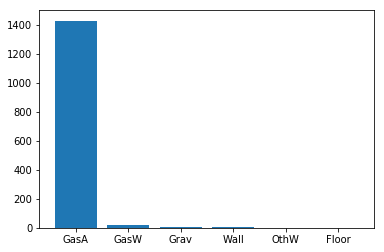

Bar graph of : HeatingQC


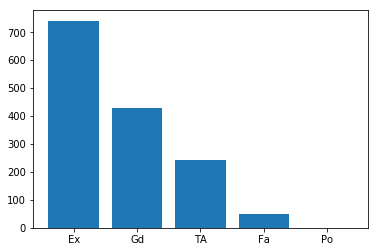

Bar graph of : HouseStyle


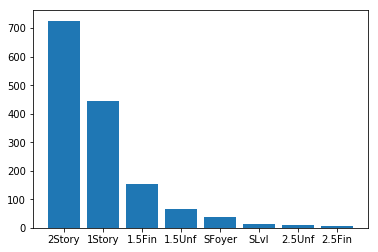

Histogram of : Id


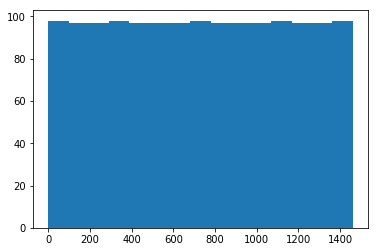

Histogram of : KitchenAbvGr


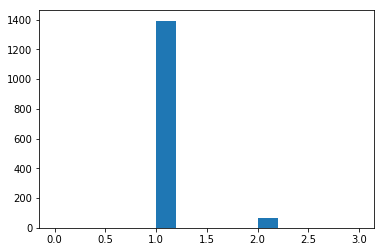

Bar graph of : KitchenQual


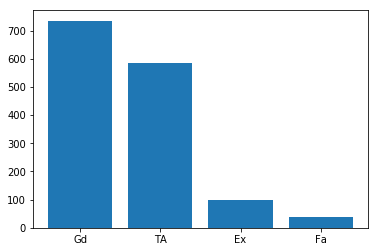

Bar graph of : LandContour


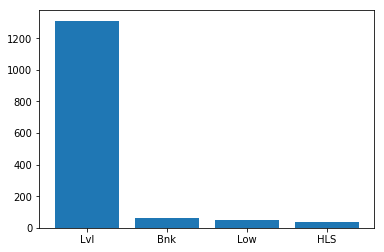

Bar graph of : LandSlope


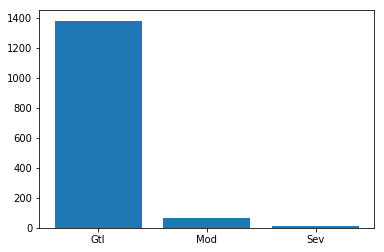

Histogram of : LotArea


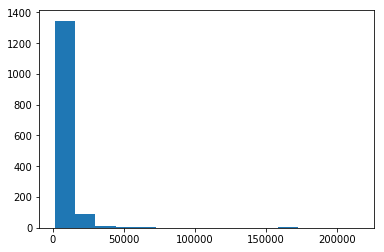

Bar graph of : LotConfig


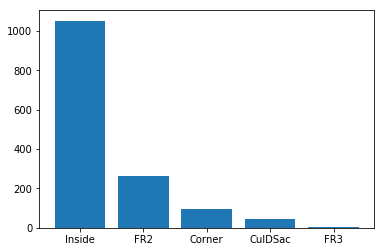

Histogram of : LotFrontage


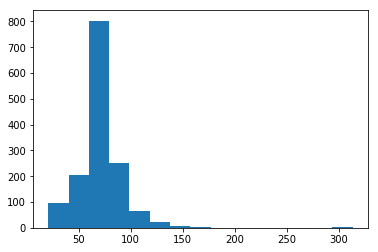

Bar graph of : LotShape


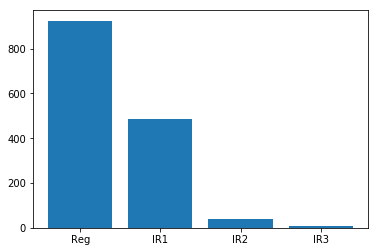

Histogram of : LowQualFinSF


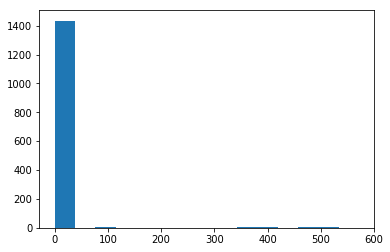

Histogram of : MSSubClass


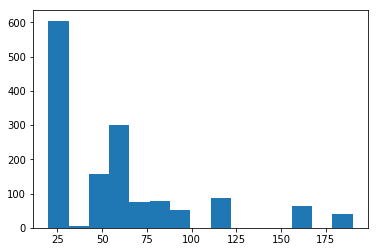

Bar graph of : MSZoning


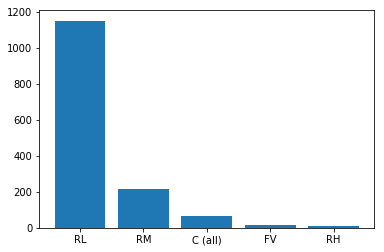

Histogram of : MasVnrArea


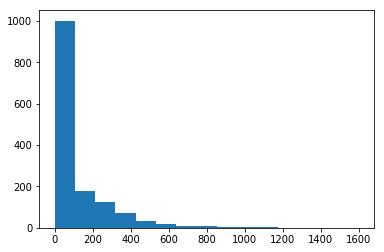

Bar graph of : MasVnrType


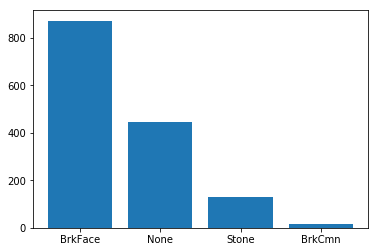

Histogram of : MiscVal


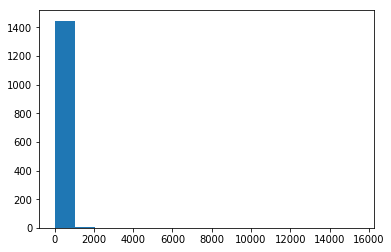

Histogram of : MoSold


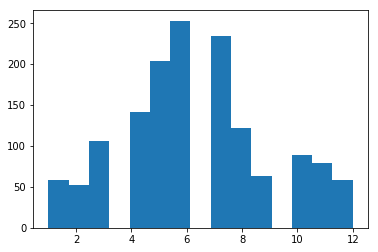

Bar graph of : Neighborhood


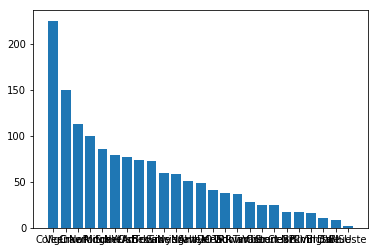

Histogram of : OpenPorchSF


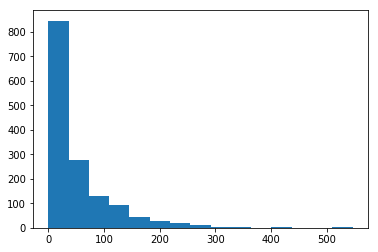

Histogram of : OverallCond


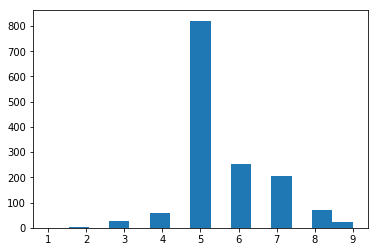

Histogram of : OverallQual


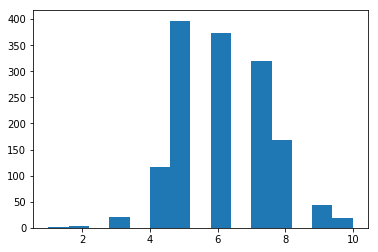

Bar graph of : PavedDrive


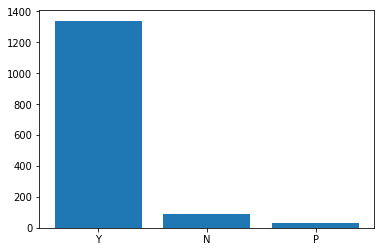

Histogram of : PoolArea


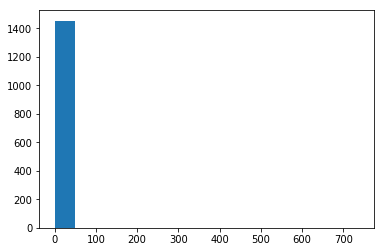

Bar graph of : RoofMatl


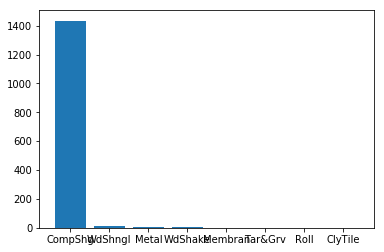

Bar graph of : RoofStyle


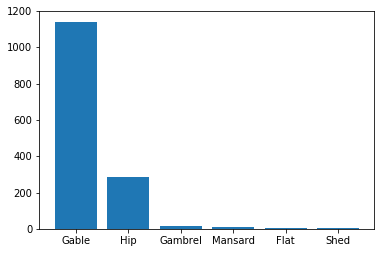

Bar graph of : SaleCondition


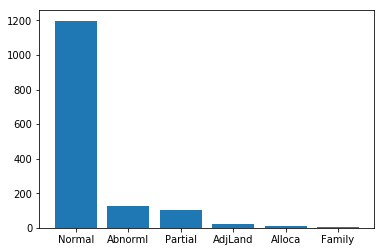

Bar graph of : SaleType


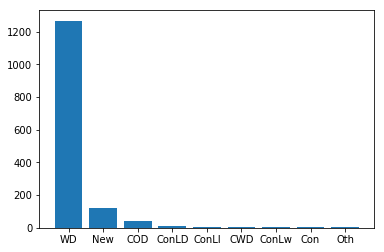

Histogram of : ScreenPorch


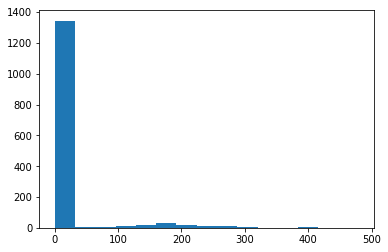

Bar graph of : Street


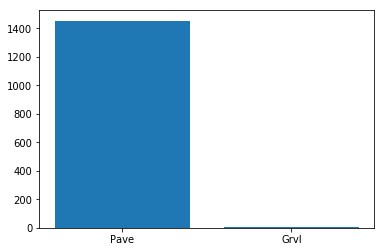

Histogram of : TotRmsAbvGrd


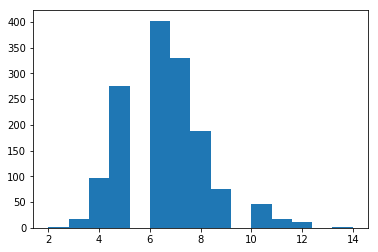

Histogram of : TotalBsmtSF


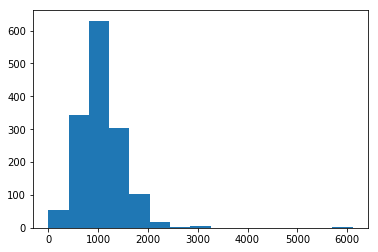

Bar graph of : Utilities


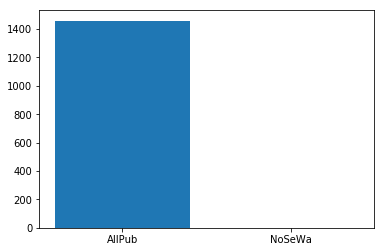

Histogram of : WoodDeckSF


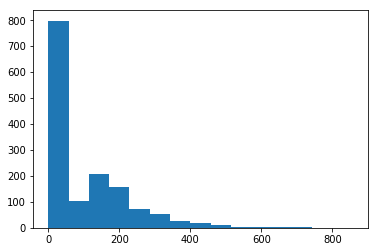

Histogram of : YearBuilt


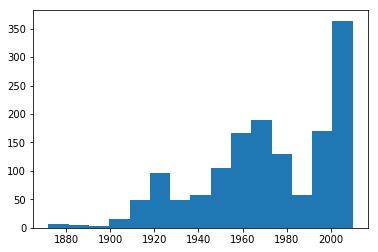

Histogram of : YearRemodAdd


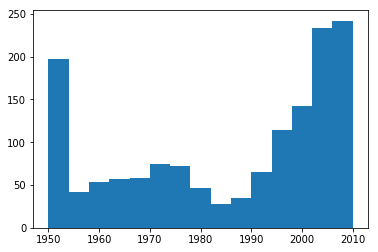

Histogram of : YrSold


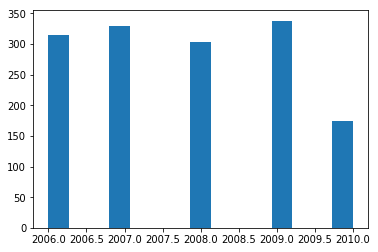

In [14]:
def plot_vars_aft_impute(df):
    for i in df.columns[1:]:
        if (df[i].dtype == 'int64') or (df[i].dtype == 'float64'):
            print('Histogram of :',i)
            plt.hist(df[i],bins=15)
            plt.show()
        else:
            print('Bar graph of :',i)
            plt.bar(df[i].unique().tolist(),df[i].value_counts().tolist())
            plt.show()
            
plot_vars_aft_impute(X)

Handling multicollinearity:

In [15]:
def show_unimp_vars(df,max_corr):

    dfq = df.corr()

    corr = []

    for ind,row in dfq.iterrows():
        for i in row.index.tolist():
            if ind != i and abs(row[i]) > max_corr:
                if (i,ind) in corr:
                    continue
                else:
                    corr.append((ind,i))
    
    return corr


corr_list = show_unimp_vars(X, max_corr = 0.7)

Removing unnecessary features (that do not contribute much to the prediction)

In [16]:
def no_contri_vars(df,min_corr):    

    not_so_imp_vars = []

    for i in df[df.columns.difference(['SalePrice'])].columns:
        if df[i].dtype == 'int64' or df[i].dtype == 'float64':
            if (abs(df[i].corr(df['SalePrice'])) < min_corr):
                not_so_imp_vars.append(i)

    return not_so_imp_vars

unimp_vars = no_contri_vars(data,0.1)

In [17]:
corr_list

[('1stFlrSF', 'TotalBsmtSF'),
 ('GarageArea', 'GarageCars'),
 ('GarageYrBlt', 'YearBuilt'),
 ('GrLivArea', 'TotRmsAbvGrd')]

Checking the multicollinear features' contribution to the prediction

In [18]:
print(data['SalePrice'].corr(data['1stFlrSF']))

print(data['SalePrice'].corr(data['2ndFlrSF']))

print(data['TotalBsmtSF'].corr(data['SalePrice']))

data['TotalBsmtSF'].corr(data['1stFlrSF'])

0.6058521846919147
0.3193338028320677
0.6135805515591954


0.8195299750050334

In [19]:
unimp_vars.extend(['2ndFlrSF','GarageArea','TotRmsAbvGrd','GarageYrBlt'])

Dropping the above selected variables!

In [20]:
X.drop(columns=unimp_vars,inplace=True)

Pre-processing the predictors before model-building

In [21]:
def preprocessing_X(df):  
    
    X_ = pd.get_dummies(X)
    
    from sklearn.preprocessing import MinMaxScaler

    STS = MinMaxScaler()

    X_[X_.select_dtypes(['int64','float64']).columns.tolist()] = STS.fit_transform(X_[X_.select_dtypes(['int64','float64']).columns.tolist()])
    
    return X_

X_ = preprocessing_X(X)

C:\Users\nayak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<b>Plotting the data to see its structure

In 2d:

In [22]:
from sklearn.decomposition import PCA

[2.28082268] 



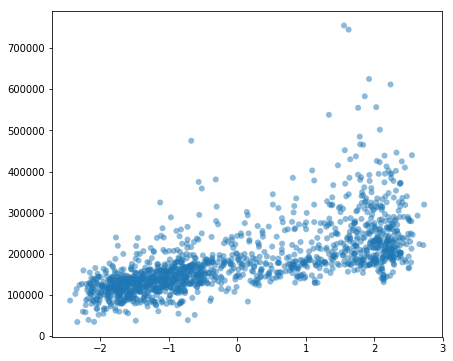

In [23]:
def pca_plot_2d_binaryclass(design_matrix,target):
    
    pca_plot = PCA(n_components=1).fit(design_matrix)
    print(pca_plot.explained_variance_,'\n')
    pcs = pca_plot.transform(design_matrix)

    plt.figure(figsize=(7,6))
    plt.scatter(pcs,y, edgecolor='', alpha=0.5)
    plt.show()
    
pca_plot_2d_binaryclass(X_,y)

In 3d:

[2.28082268 0.88968478] 



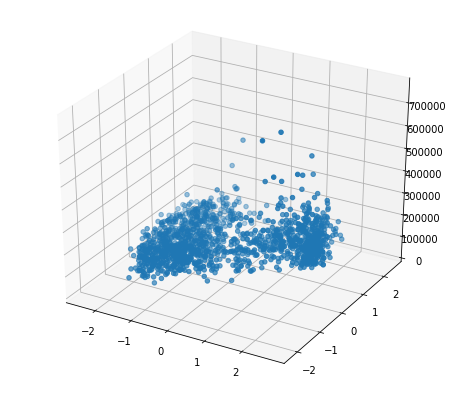

In [24]:
def pca_plot_3d_binaryclass(design_matrix,target):
    
    pca_plot = PCA(n_components=2).fit(design_matrix)
    print(pca_plot.explained_variance_,'\n')
    pcs = pca_plot.transform(design_matrix)

    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(8,7))
    ax = fig.add_subplot(111, projection='3d')
    xs = pcs[:,0] 
    ys = pcs[:,1]
    zs = target
    ax.scatter(xs,ys,zs, marker = 'o')
    plt.show()
    
pca_plot_3d_binaryclass(X_,y)

<b>Model building</b>

In [25]:
def model_built(X1,y1, test_ratio):
    
    from sklearn.model_selection import train_test_split

    X_train,X_test,y_train,y_test = train_test_split(X1,y1,random_state=123,test_size=test_ratio)
      
    from sklearn.linear_model import LinearRegression

    linreg = LinearRegression().fit(X_train,y_train)
    
    return linreg, X_train, X_test, y_train, y_test

LR,X_train, X_test, y_train, y_test = model_built(X_, y, 0.25)

In [26]:
y_pred_train = LR.predict(X_train)

y_pred_test = LR.predict(X_test)

[2.29552752 0.86054486] 



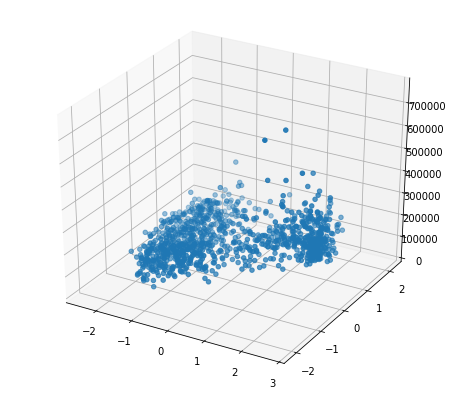

In [31]:
pca_plot_3d_binaryclass(X_train,y_train)

[2.29783562 0.99274933] 



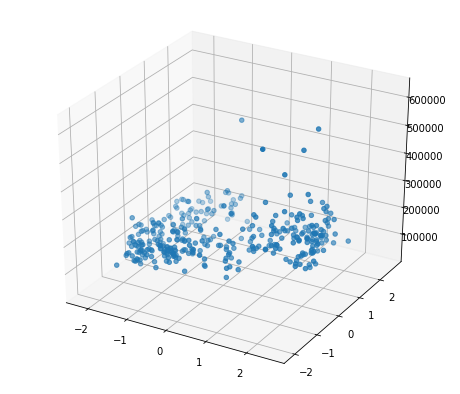

In [32]:
pca_plot_3d_binaryclass(X_test,y_test)

<b>Model Evaluation</b>

In [33]:
def metrics(X_train, X_test,y_tn, y_pred_tn, y_ts, y_pred_ts):

    from sklearn.metrics import r2_score
    
    r_train = r2_score(y_tn, y_pred_tn)
    
    r_test = r2_score(y_ts, y_pred_ts)
    
    print('R squared on train data :',r_train)
    print('R squared on test data :',r_test)
    
    print('Training MSE :',sum((y_pred_tn - y_tn)**2/len(y_tn))**0.5)
    print('Test MSE :',sum((y_pred_ts - y_ts)**2/len(y_ts))**0.5)

    
metrics(X_train, X_test, y_train, y_pred_train,y_test,y_pred_test)

R squared on train data : 0.9324860733268986
R squared on test data : -3.0286691860375346e+20
Training MSE : 20781.590245183845
Test MSE : 1351456370029685.5


### WORST FITT EVERRR!!

In [34]:
X_.shape

(1460, 263)

<b> Our model has overfitted on the training set because of there are less data points for the number of features! </b>

Let us check the feature importances and do feature selection

In [35]:
import statsmodels.api as sm

X_tp = X.copy()
X_tp = sm.add_constant(X_tp)
LR_tp = sm.OLS(y_train, X_train).fit()

pvaluetable = LR_tp.summary2().tables[1]

C:\Users\nayak\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\nayak\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\nayak\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\nayak\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Feature selection on the basis of the level of significance!

In [36]:
X_ = X_.loc[:,pvaluetable[pvaluetable.sort_values(by=['P>|t|'])['P>|t|'] < 0.01].index.tolist()]

C:\Users\nayak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [37]:
X_.shape

(1460, 43)

In [38]:
LR2,X2_train, X2_test, y2_train, y2_test = model_built(X_,y,0.25)

In [39]:
y2_pred_train = LR2.predict(X2_train)

y2_pred_test = LR2.predict(X2_test)

In [40]:
metrics(X2_train, X2_test, y2_train, y2_pred_train,y2_test,y2_pred_test)

R squared on train data : 0.8659132543789931
R squared on test data : 0.8426490910092048
Training MSE : 29287.008873021165
Test MSE : 30804.257009132598


<b>Much better!!!</b>

Let us check if Regularization helps with the results!

In [41]:
X_1 = X.copy()
X_1 = preprocessing_X(X_1)

C:\Users\nayak\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


<b>RIDGE</b>

In [42]:
def Ridge(X1,y1,test_ratio): 

    from sklearn.model_selection import train_test_split
    
    from sklearn.linear_model import Ridge

    X_train,X_test,y_train,y_test = train_test_split(X1,y1,random_state=123,test_size=test_ratio)

    Rg = Ridge(alpha=0.1, normalize=True).fit(X1, y1)

    y_r_train = Rg.predict(X_train)
    
    y_r_test = Rg.predict(X_test)
    
    return Rg,X_train, X_test, y_train, y_test, y_r_train,y_r_test

Rdge,X_rg_train,X_rg_test, y_rg_train, y_rg_test, ypred_rg_train, ypred_rg_test = Ridge(X_1,y,0.25)

In [43]:
metrics(X_rg_train,X_rg_test, y_rg_train, ypred_rg_train, y_rg_test, ypred_rg_test)

R squared on train data : 0.9221956649065702
R squared on test data : 0.9143956946356865
Training MSE : 22309.199720112203
Test MSE : 22720.815437084864


<b> What a change in the results!! This is because Ridge has set the coefficients of the unimportant variables to a lower value than that of the important variables! </b>

Confirming that here: (Because the features are scaled, the co-efficients seem to be huge in magnitude!)

In [44]:
for i in Rdge.coef_:
    for j in X_:
        print(j,' :',i)

GarageCars  : 64362.45738361002
GrLivArea  : 64362.45738361002
LotArea  : 64362.45738361002
OverallQual  : 64362.45738361002
YearRemodAdd  : 64362.45738361002
BldgType_1Fam  : 64362.45738361002
BldgType_TwnhsE  : 64362.45738361002
BsmtQual_Gd  : 64362.45738361002
CentralAir_N  : 64362.45738361002
Condition2_Norm  : 64362.45738361002
Condition2_PosN  : 64362.45738361002
Condition2_RRNn  : 64362.45738361002
ExterQual_Gd  : 64362.45738361002
ExterQual_TA  : 64362.45738361002
Exterior1st_AsphShn  : 64362.45738361002
Exterior1st_ImStucc  : 64362.45738361002
Exterior2nd_ImStucc  : 64362.45738361002
Functional_Typ  : 64362.45738361002
GarageFinish_RFn  : 64362.45738361002
HouseStyle_1Story  : 64362.45738361002
HouseStyle_2.5Fin  : 64362.45738361002
KitchenQual_Gd  : 64362.45738361002
KitchenQual_TA  : 64362.45738361002
LandContour_Low  : 64362.45738361002
LandSlope_Sev  : 64362.45738361002
MSZoning_C (all)  : 64362.45738361002
Neighborhood_ClearCr  : 64362.45738361002
Neighborhood_Crawfor  : 

BldgType_1Fam  : 22803.532876947796
BldgType_TwnhsE  : 22803.532876947796
BsmtQual_Gd  : 22803.532876947796
CentralAir_N  : 22803.532876947796
Condition2_Norm  : 22803.532876947796
Condition2_PosN  : 22803.532876947796
Condition2_RRNn  : 22803.532876947796
ExterQual_Gd  : 22803.532876947796
ExterQual_TA  : 22803.532876947796
Exterior1st_AsphShn  : 22803.532876947796
Exterior1st_ImStucc  : 22803.532876947796
Exterior2nd_ImStucc  : 22803.532876947796
Functional_Typ  : 22803.532876947796
GarageFinish_RFn  : 22803.532876947796
HouseStyle_1Story  : 22803.532876947796
HouseStyle_2.5Fin  : 22803.532876947796
KitchenQual_Gd  : 22803.532876947796
KitchenQual_TA  : 22803.532876947796
LandContour_Low  : 22803.532876947796
LandSlope_Sev  : 22803.532876947796
MSZoning_C (all)  : 22803.532876947796
Neighborhood_ClearCr  : 22803.532876947796
Neighborhood_Crawfor  : 22803.532876947796
Neighborhood_Edwards  : 22803.532876947796
Neighborhood_Mitchel  : 22803.532876947796
Neighborhood_NAmes  : 22803.5328

Condition2_PosN  : 10824.136333896697
Condition2_RRNn  : 10824.136333896697
ExterQual_Gd  : 10824.136333896697
ExterQual_TA  : 10824.136333896697
Exterior1st_AsphShn  : 10824.136333896697
Exterior1st_ImStucc  : 10824.136333896697
Exterior2nd_ImStucc  : 10824.136333896697
Functional_Typ  : 10824.136333896697
GarageFinish_RFn  : 10824.136333896697
HouseStyle_1Story  : 10824.136333896697
HouseStyle_2.5Fin  : 10824.136333896697
KitchenQual_Gd  : 10824.136333896697
KitchenQual_TA  : 10824.136333896697
LandContour_Low  : 10824.136333896697
LandSlope_Sev  : 10824.136333896697
MSZoning_C (all)  : 10824.136333896697
Neighborhood_ClearCr  : 10824.136333896697
Neighborhood_Crawfor  : 10824.136333896697
Neighborhood_Edwards  : 10824.136333896697
Neighborhood_Mitchel  : 10824.136333896697
Neighborhood_NAmes  : 10824.136333896697
Neighborhood_NWAmes  : 10824.136333896697
Neighborhood_NoRidge  : 10824.136333896697
Neighborhood_NridgHt  : 10824.136333896697
Neighborhood_StoneBr  : 10824.136333896697
R

KitchenQual_Gd  : 981.0040490740075
KitchenQual_TA  : 981.0040490740075
LandContour_Low  : 981.0040490740075
LandSlope_Sev  : 981.0040490740075
MSZoning_C (all)  : 981.0040490740075
Neighborhood_ClearCr  : 981.0040490740075
Neighborhood_Crawfor  : 981.0040490740075
Neighborhood_Edwards  : 981.0040490740075
Neighborhood_Mitchel  : 981.0040490740075
Neighborhood_NAmes  : 981.0040490740075
Neighborhood_NWAmes  : 981.0040490740075
Neighborhood_NoRidge  : 981.0040490740075
Neighborhood_NridgHt  : 981.0040490740075
Neighborhood_StoneBr  : 981.0040490740075
RoofMatl_ClyTile  : 981.0040490740075
RoofMatl_CompShg  : 981.0040490740075
RoofMatl_Membran  : 981.0040490740075
RoofMatl_Tar&Grv  : 981.0040490740075
RoofMatl_WdShngl  : 981.0040490740075
RoofStyle_Gable  : 981.0040490740075
RoofStyle_Hip  : 981.0040490740075
Street_Grvl  : 981.0040490740075
GarageCars  : 13258.843514989368
GrLivArea  : 13258.843514989368
LotArea  : 13258.843514989368
OverallQual  : 13258.843514989368
YearRemodAdd  : 132

Neighborhood_NAmes  : -5248.11595809731
Neighborhood_NWAmes  : -5248.11595809731
Neighborhood_NoRidge  : -5248.11595809731
Neighborhood_NridgHt  : -5248.11595809731
Neighborhood_StoneBr  : -5248.11595809731
RoofMatl_ClyTile  : -5248.11595809731
RoofMatl_CompShg  : -5248.11595809731
RoofMatl_Membran  : -5248.11595809731
RoofMatl_Tar&Grv  : -5248.11595809731
RoofMatl_WdShngl  : -5248.11595809731
RoofStyle_Gable  : -5248.11595809731
RoofStyle_Hip  : -5248.11595809731
Street_Grvl  : -5248.11595809731
GarageCars  : -1681.5191252129991
GrLivArea  : -1681.5191252129991
LotArea  : -1681.5191252129991
OverallQual  : -1681.5191252129991
YearRemodAdd  : -1681.5191252129991
BldgType_1Fam  : -1681.5191252129991
BldgType_TwnhsE  : -1681.5191252129991
BsmtQual_Gd  : -1681.5191252129991
CentralAir_N  : -1681.5191252129991
Condition2_Norm  : -1681.5191252129991
Condition2_PosN  : -1681.5191252129991
Condition2_RRNn  : -1681.5191252129991
ExterQual_Gd  : -1681.5191252129991
ExterQual_TA  : -1681.5191252

RoofMatl_Membran  : -3510.13343027139
RoofMatl_Tar&Grv  : -3510.13343027139
RoofMatl_WdShngl  : -3510.13343027139
RoofStyle_Gable  : -3510.13343027139
RoofStyle_Hip  : -3510.13343027139
Street_Grvl  : -3510.13343027139
GarageCars  : -2383.3229337222697
GrLivArea  : -2383.3229337222697
LotArea  : -2383.3229337222697
OverallQual  : -2383.3229337222697
YearRemodAdd  : -2383.3229337222697
BldgType_1Fam  : -2383.3229337222697
BldgType_TwnhsE  : -2383.3229337222697
BsmtQual_Gd  : -2383.3229337222697
CentralAir_N  : -2383.3229337222697
Condition2_Norm  : -2383.3229337222697
Condition2_PosN  : -2383.3229337222697
Condition2_RRNn  : -2383.3229337222697
ExterQual_Gd  : -2383.3229337222697
ExterQual_TA  : -2383.3229337222697
Exterior1st_AsphShn  : -2383.3229337222697
Exterior1st_ImStucc  : -2383.3229337222697
Exterior2nd_ImStucc  : -2383.3229337222697
Functional_Typ  : -2383.3229337222697
GarageFinish_RFn  : -2383.3229337222697
HouseStyle_1Story  : -2383.3229337222697
HouseStyle_2.5Fin  : -2383.3

KitchenQual_Gd  : -6075.261111797438
KitchenQual_TA  : -6075.261111797438
LandContour_Low  : -6075.261111797438
LandSlope_Sev  : -6075.261111797438
MSZoning_C (all)  : -6075.261111797438
Neighborhood_ClearCr  : -6075.261111797438
Neighborhood_Crawfor  : -6075.261111797438
Neighborhood_Edwards  : -6075.261111797438
Neighborhood_Mitchel  : -6075.261111797438
Neighborhood_NAmes  : -6075.261111797438
Neighborhood_NWAmes  : -6075.261111797438
Neighborhood_NoRidge  : -6075.261111797438
Neighborhood_NridgHt  : -6075.261111797438
Neighborhood_StoneBr  : -6075.261111797438
RoofMatl_ClyTile  : -6075.261111797438
RoofMatl_CompShg  : -6075.261111797438
RoofMatl_Membran  : -6075.261111797438
RoofMatl_Tar&Grv  : -6075.261111797438
RoofMatl_WdShngl  : -6075.261111797438
RoofStyle_Gable  : -6075.261111797438
RoofStyle_Hip  : -6075.261111797438
Street_Grvl  : -6075.261111797438
GarageCars  : -4344.851225383557
GrLivArea  : -4344.851225383557
LotArea  : -4344.851225383557
OverallQual  : -4344.8512253835

BldgType_1Fam  : 7383.509937324018
BldgType_TwnhsE  : 7383.509937324018
BsmtQual_Gd  : 7383.509937324018
CentralAir_N  : 7383.509937324018
Condition2_Norm  : 7383.509937324018
Condition2_PosN  : 7383.509937324018
Condition2_RRNn  : 7383.509937324018
ExterQual_Gd  : 7383.509937324018
ExterQual_TA  : 7383.509937324018
Exterior1st_AsphShn  : 7383.509937324018
Exterior1st_ImStucc  : 7383.509937324018
Exterior2nd_ImStucc  : 7383.509937324018
Functional_Typ  : 7383.509937324018
GarageFinish_RFn  : 7383.509937324018
HouseStyle_1Story  : 7383.509937324018
HouseStyle_2.5Fin  : 7383.509937324018
KitchenQual_Gd  : 7383.509937324018
KitchenQual_TA  : 7383.509937324018
LandContour_Low  : 7383.509937324018
LandSlope_Sev  : 7383.509937324018
MSZoning_C (all)  : 7383.509937324018
Neighborhood_ClearCr  : 7383.509937324018
Neighborhood_Crawfor  : 7383.509937324018
Neighborhood_Edwards  : 7383.509937324018
Neighborhood_Mitchel  : 7383.509937324018
Neighborhood_NAmes  : 7383.509937324018
Neighborhood_NWAm

RoofMatl_Membran  : -52.741066561900524
RoofMatl_Tar&Grv  : -52.741066561900524
RoofMatl_WdShngl  : -52.741066561900524
RoofStyle_Gable  : -52.741066561900524
RoofStyle_Hip  : -52.741066561900524
Street_Grvl  : -52.741066561900524
GarageCars  : 20634.300428819766
GrLivArea  : 20634.300428819766
LotArea  : 20634.300428819766
OverallQual  : 20634.300428819766
YearRemodAdd  : 20634.300428819766
BldgType_1Fam  : 20634.300428819766
BldgType_TwnhsE  : 20634.300428819766
BsmtQual_Gd  : 20634.300428819766
CentralAir_N  : 20634.300428819766
Condition2_Norm  : 20634.300428819766
Condition2_PosN  : 20634.300428819766
Condition2_RRNn  : 20634.300428819766
ExterQual_Gd  : 20634.300428819766
ExterQual_TA  : 20634.300428819766
Exterior1st_AsphShn  : 20634.300428819766
Exterior1st_ImStucc  : 20634.300428819766
Exterior2nd_ImStucc  : 20634.300428819766
Functional_Typ  : 20634.300428819766
GarageFinish_RFn  : 20634.300428819766
HouseStyle_1Story  : 20634.300428819766
HouseStyle_2.5Fin  : 20634.300428819

KitchenQual_Gd  : -41457.89219985093
KitchenQual_TA  : -41457.89219985093
LandContour_Low  : -41457.89219985093
LandSlope_Sev  : -41457.89219985093
MSZoning_C (all)  : -41457.89219985093
Neighborhood_ClearCr  : -41457.89219985093
Neighborhood_Crawfor  : -41457.89219985093
Neighborhood_Edwards  : -41457.89219985093
Neighborhood_Mitchel  : -41457.89219985093
Neighborhood_NAmes  : -41457.89219985093
Neighborhood_NWAmes  : -41457.89219985093
Neighborhood_NoRidge  : -41457.89219985093
Neighborhood_NridgHt  : -41457.89219985093
Neighborhood_StoneBr  : -41457.89219985093
RoofMatl_ClyTile  : -41457.89219985093
RoofMatl_CompShg  : -41457.89219985093
RoofMatl_Membran  : -41457.89219985093
RoofMatl_Tar&Grv  : -41457.89219985093
RoofMatl_WdShngl  : -41457.89219985093
RoofStyle_Gable  : -41457.89219985093
RoofStyle_Hip  : -41457.89219985093
Street_Grvl  : -41457.89219985093
GarageCars  : 1304.9834376916035
GrLivArea  : 1304.9834376916035
LotArea  : 1304.9834376916035
OverallQual  : 1304.98343769160

Condition2_PosN  : -2131.593657589552
Condition2_RRNn  : -2131.593657589552
ExterQual_Gd  : -2131.593657589552
ExterQual_TA  : -2131.593657589552
Exterior1st_AsphShn  : -2131.593657589552
Exterior1st_ImStucc  : -2131.593657589552
Exterior2nd_ImStucc  : -2131.593657589552
Functional_Typ  : -2131.593657589552
GarageFinish_RFn  : -2131.593657589552
HouseStyle_1Story  : -2131.593657589552
HouseStyle_2.5Fin  : -2131.593657589552
KitchenQual_Gd  : -2131.593657589552
KitchenQual_TA  : -2131.593657589552
LandContour_Low  : -2131.593657589552
LandSlope_Sev  : -2131.593657589552
MSZoning_C (all)  : -2131.593657589552
Neighborhood_ClearCr  : -2131.593657589552
Neighborhood_Crawfor  : -2131.593657589552
Neighborhood_Edwards  : -2131.593657589552
Neighborhood_Mitchel  : -2131.593657589552
Neighborhood_NAmes  : -2131.593657589552
Neighborhood_NWAmes  : -2131.593657589552
Neighborhood_NoRidge  : -2131.593657589552
Neighborhood_NridgHt  : -2131.593657589552
Neighborhood_StoneBr  : -2131.593657589552
R

Neighborhood_Edwards  : -18976.37612264632
Neighborhood_Mitchel  : -18976.37612264632
Neighborhood_NAmes  : -18976.37612264632
Neighborhood_NWAmes  : -18976.37612264632
Neighborhood_NoRidge  : -18976.37612264632
Neighborhood_NridgHt  : -18976.37612264632
Neighborhood_StoneBr  : -18976.37612264632
RoofMatl_ClyTile  : -18976.37612264632
RoofMatl_CompShg  : -18976.37612264632
RoofMatl_Membran  : -18976.37612264632
RoofMatl_Tar&Grv  : -18976.37612264632
RoofMatl_WdShngl  : -18976.37612264632
RoofStyle_Gable  : -18976.37612264632
RoofStyle_Hip  : -18976.37612264632
Street_Grvl  : -18976.37612264632
GarageCars  : -2088.340437099906
GrLivArea  : -2088.340437099906
LotArea  : -2088.340437099906
OverallQual  : -2088.340437099906
YearRemodAdd  : -2088.340437099906
BldgType_1Fam  : -2088.340437099906
BldgType_TwnhsE  : -2088.340437099906
BsmtQual_Gd  : -2088.340437099906
CentralAir_N  : -2088.340437099906
Condition2_Norm  : -2088.340437099906
Condition2_PosN  : -2088.340437099906
Condition2_RRNn 

Neighborhood_ClearCr  : -4919.414374824358
Neighborhood_Crawfor  : -4919.414374824358
Neighborhood_Edwards  : -4919.414374824358
Neighborhood_Mitchel  : -4919.414374824358
Neighborhood_NAmes  : -4919.414374824358
Neighborhood_NWAmes  : -4919.414374824358
Neighborhood_NoRidge  : -4919.414374824358
Neighborhood_NridgHt  : -4919.414374824358
Neighborhood_StoneBr  : -4919.414374824358
RoofMatl_ClyTile  : -4919.414374824358
RoofMatl_CompShg  : -4919.414374824358
RoofMatl_Membran  : -4919.414374824358
RoofMatl_Tar&Grv  : -4919.414374824358
RoofMatl_WdShngl  : -4919.414374824358
RoofStyle_Gable  : -4919.414374824358
RoofStyle_Hip  : -4919.414374824358
Street_Grvl  : -4919.414374824358
GarageCars  : 8995.468557380625
GrLivArea  : 8995.468557380625
LotArea  : 8995.468557380625
OverallQual  : 8995.468557380625
YearRemodAdd  : 8995.468557380625
BldgType_1Fam  : 8995.468557380625
BldgType_TwnhsE  : 8995.468557380625
BsmtQual_Gd  : 8995.468557380625
CentralAir_N  : 8995.468557380625
Condition2_Norm

Condition2_PosN  : 659.3630172564434
Condition2_RRNn  : 659.3630172564434
ExterQual_Gd  : 659.3630172564434
ExterQual_TA  : 659.3630172564434
Exterior1st_AsphShn  : 659.3630172564434
Exterior1st_ImStucc  : 659.3630172564434
Exterior2nd_ImStucc  : 659.3630172564434
Functional_Typ  : 659.3630172564434
GarageFinish_RFn  : 659.3630172564434
HouseStyle_1Story  : 659.3630172564434
HouseStyle_2.5Fin  : 659.3630172564434
KitchenQual_Gd  : 659.3630172564434
KitchenQual_TA  : 659.3630172564434
LandContour_Low  : 659.3630172564434
LandSlope_Sev  : 659.3630172564434
MSZoning_C (all)  : 659.3630172564434
Neighborhood_ClearCr  : 659.3630172564434
Neighborhood_Crawfor  : 659.3630172564434
Neighborhood_Edwards  : 659.3630172564434
Neighborhood_Mitchel  : 659.3630172564434
Neighborhood_NAmes  : 659.3630172564434
Neighborhood_NWAmes  : 659.3630172564434
Neighborhood_NoRidge  : 659.3630172564434
Neighborhood_NridgHt  : 659.3630172564434
Neighborhood_StoneBr  : 659.3630172564434
RoofMatl_ClyTile  : 659.36

RoofMatl_Membran  : -5888.876339352153
RoofMatl_Tar&Grv  : -5888.876339352153
RoofMatl_WdShngl  : -5888.876339352153
RoofStyle_Gable  : -5888.876339352153
RoofStyle_Hip  : -5888.876339352153
Street_Grvl  : -5888.876339352153
GarageCars  : -946.3225550255759
GrLivArea  : -946.3225550255759
LotArea  : -946.3225550255759
OverallQual  : -946.3225550255759
YearRemodAdd  : -946.3225550255759
BldgType_1Fam  : -946.3225550255759
BldgType_TwnhsE  : -946.3225550255759
BsmtQual_Gd  : -946.3225550255759
CentralAir_N  : -946.3225550255759
Condition2_Norm  : -946.3225550255759
Condition2_PosN  : -946.3225550255759
Condition2_RRNn  : -946.3225550255759
ExterQual_Gd  : -946.3225550255759
ExterQual_TA  : -946.3225550255759
Exterior1st_AsphShn  : -946.3225550255759
Exterior1st_ImStucc  : -946.3225550255759
Exterior2nd_ImStucc  : -946.3225550255759
Functional_Typ  : -946.3225550255759
GarageFinish_RFn  : -946.3225550255759
HouseStyle_1Story  : -946.3225550255759
HouseStyle_2.5Fin  : -946.3225550255759
Ki

KitchenQual_Gd  : 2109.1164977633753
KitchenQual_TA  : 2109.1164977633753
LandContour_Low  : 2109.1164977633753
LandSlope_Sev  : 2109.1164977633753
MSZoning_C (all)  : 2109.1164977633753
Neighborhood_ClearCr  : 2109.1164977633753
Neighborhood_Crawfor  : 2109.1164977633753
Neighborhood_Edwards  : 2109.1164977633753
Neighborhood_Mitchel  : 2109.1164977633753
Neighborhood_NAmes  : 2109.1164977633753
Neighborhood_NWAmes  : 2109.1164977633753
Neighborhood_NoRidge  : 2109.1164977633753
Neighborhood_NridgHt  : 2109.1164977633753
Neighborhood_StoneBr  : 2109.1164977633753
RoofMatl_ClyTile  : 2109.1164977633753
RoofMatl_CompShg  : 2109.1164977633753
RoofMatl_Membran  : 2109.1164977633753
RoofMatl_Tar&Grv  : 2109.1164977633753
RoofMatl_WdShngl  : 2109.1164977633753
RoofStyle_Gable  : 2109.1164977633753
RoofStyle_Hip  : 2109.1164977633753
Street_Grvl  : 2109.1164977633753
GarageCars  : -2514.8139634169065
GrLivArea  : -2514.8139634169065
LotArea  : -2514.8139634169065
OverallQual  : -2514.8139634

YearRemodAdd  : -8614.158267827794
BldgType_1Fam  : -8614.158267827794
BldgType_TwnhsE  : -8614.158267827794
BsmtQual_Gd  : -8614.158267827794
CentralAir_N  : -8614.158267827794
Condition2_Norm  : -8614.158267827794
Condition2_PosN  : -8614.158267827794
Condition2_RRNn  : -8614.158267827794
ExterQual_Gd  : -8614.158267827794
ExterQual_TA  : -8614.158267827794
Exterior1st_AsphShn  : -8614.158267827794
Exterior1st_ImStucc  : -8614.158267827794
Exterior2nd_ImStucc  : -8614.158267827794
Functional_Typ  : -8614.158267827794
GarageFinish_RFn  : -8614.158267827794
HouseStyle_1Story  : -8614.158267827794
HouseStyle_2.5Fin  : -8614.158267827794
KitchenQual_Gd  : -8614.158267827794
KitchenQual_TA  : -8614.158267827794
LandContour_Low  : -8614.158267827794
LandSlope_Sev  : -8614.158267827794
MSZoning_C (all)  : -8614.158267827794
Neighborhood_ClearCr  : -8614.158267827794
Neighborhood_Crawfor  : -8614.158267827794
Neighborhood_Edwards  : -8614.158267827794
Neighborhood_Mitchel  : -8614.1582678277

RoofMatl_Membran  : -2258.1844763563277
RoofMatl_Tar&Grv  : -2258.1844763563277
RoofMatl_WdShngl  : -2258.1844763563277
RoofStyle_Gable  : -2258.1844763563277
RoofStyle_Hip  : -2258.1844763563277
Street_Grvl  : -2258.1844763563277
GarageCars  : -3455.217571146047
GrLivArea  : -3455.217571146047
LotArea  : -3455.217571146047
OverallQual  : -3455.217571146047
YearRemodAdd  : -3455.217571146047
BldgType_1Fam  : -3455.217571146047
BldgType_TwnhsE  : -3455.217571146047
BsmtQual_Gd  : -3455.217571146047
CentralAir_N  : -3455.217571146047
Condition2_Norm  : -3455.217571146047
Condition2_PosN  : -3455.217571146047
Condition2_RRNn  : -3455.217571146047
ExterQual_Gd  : -3455.217571146047
ExterQual_TA  : -3455.217571146047
Exterior1st_AsphShn  : -3455.217571146047
Exterior1st_ImStucc  : -3455.217571146047
Exterior2nd_ImStucc  : -3455.217571146047
Functional_Typ  : -3455.217571146047
GarageFinish_RFn  : -3455.217571146047
HouseStyle_1Story  : -3455.217571146047
HouseStyle_2.5Fin  : -3455.217571146

HouseStyle_2.5Fin  : -12057.489945465737
KitchenQual_Gd  : -12057.489945465737
KitchenQual_TA  : -12057.489945465737
LandContour_Low  : -12057.489945465737
LandSlope_Sev  : -12057.489945465737
MSZoning_C (all)  : -12057.489945465737
Neighborhood_ClearCr  : -12057.489945465737
Neighborhood_Crawfor  : -12057.489945465737
Neighborhood_Edwards  : -12057.489945465737
Neighborhood_Mitchel  : -12057.489945465737
Neighborhood_NAmes  : -12057.489945465737
Neighborhood_NWAmes  : -12057.489945465737
Neighborhood_NoRidge  : -12057.489945465737
Neighborhood_NridgHt  : -12057.489945465737
Neighborhood_StoneBr  : -12057.489945465737
RoofMatl_ClyTile  : -12057.489945465737
RoofMatl_CompShg  : -12057.489945465737
RoofMatl_Membran  : -12057.489945465737
RoofMatl_Tar&Grv  : -12057.489945465737
RoofMatl_WdShngl  : -12057.489945465737
RoofStyle_Gable  : -12057.489945465737
RoofStyle_Hip  : -12057.489945465737
Street_Grvl  : -12057.489945465737
GarageCars  : -1310.4325914303479
GrLivArea  : -1310.4325914303

YearRemodAdd  : -1961.0926910797702
BldgType_1Fam  : -1961.0926910797702
BldgType_TwnhsE  : -1961.0926910797702
BsmtQual_Gd  : -1961.0926910797702
CentralAir_N  : -1961.0926910797702
Condition2_Norm  : -1961.0926910797702
Condition2_PosN  : -1961.0926910797702
Condition2_RRNn  : -1961.0926910797702
ExterQual_Gd  : -1961.0926910797702
ExterQual_TA  : -1961.0926910797702
Exterior1st_AsphShn  : -1961.0926910797702
Exterior1st_ImStucc  : -1961.0926910797702
Exterior2nd_ImStucc  : -1961.0926910797702
Functional_Typ  : -1961.0926910797702
GarageFinish_RFn  : -1961.0926910797702
HouseStyle_1Story  : -1961.0926910797702
HouseStyle_2.5Fin  : -1961.0926910797702
KitchenQual_Gd  : -1961.0926910797702
KitchenQual_TA  : -1961.0926910797702
LandContour_Low  : -1961.0926910797702
LandSlope_Sev  : -1961.0926910797702
MSZoning_C (all)  : -1961.0926910797702
Neighborhood_ClearCr  : -1961.0926910797702
Neighborhood_Crawfor  : -1961.0926910797702
Neighborhood_Edwards  : -1961.0926910797702
Neighborhood_Mi

Neighborhood_NWAmes  : -7734.047195964847
Neighborhood_NoRidge  : -7734.047195964847
Neighborhood_NridgHt  : -7734.047195964847
Neighborhood_StoneBr  : -7734.047195964847
RoofMatl_ClyTile  : -7734.047195964847
RoofMatl_CompShg  : -7734.047195964847
RoofMatl_Membran  : -7734.047195964847
RoofMatl_Tar&Grv  : -7734.047195964847
RoofMatl_WdShngl  : -7734.047195964847
RoofStyle_Gable  : -7734.047195964847
RoofStyle_Hip  : -7734.047195964847
Street_Grvl  : -7734.047195964847
GarageCars  : -2049.8471283776753
GrLivArea  : -2049.8471283776753
LotArea  : -2049.8471283776753
OverallQual  : -2049.8471283776753
YearRemodAdd  : -2049.8471283776753
BldgType_1Fam  : -2049.8471283776753
BldgType_TwnhsE  : -2049.8471283776753
BsmtQual_Gd  : -2049.8471283776753
CentralAir_N  : -2049.8471283776753
Condition2_Norm  : -2049.8471283776753
Condition2_PosN  : -2049.8471283776753
Condition2_RRNn  : -2049.8471283776753
ExterQual_Gd  : -2049.8471283776753
ExterQual_TA  : -2049.8471283776753
Exterior1st_AsphShn  

Exterior1st_ImStucc  : -173.96759704518564
Exterior2nd_ImStucc  : -173.96759704518564
Functional_Typ  : -173.96759704518564
GarageFinish_RFn  : -173.96759704518564
HouseStyle_1Story  : -173.96759704518564
HouseStyle_2.5Fin  : -173.96759704518564
KitchenQual_Gd  : -173.96759704518564
KitchenQual_TA  : -173.96759704518564
LandContour_Low  : -173.96759704518564
LandSlope_Sev  : -173.96759704518564
MSZoning_C (all)  : -173.96759704518564
Neighborhood_ClearCr  : -173.96759704518564
Neighborhood_Crawfor  : -173.96759704518564
Neighborhood_Edwards  : -173.96759704518564
Neighborhood_Mitchel  : -173.96759704518564
Neighborhood_NAmes  : -173.96759704518564
Neighborhood_NWAmes  : -173.96759704518564
Neighborhood_NoRidge  : -173.96759704518564
Neighborhood_NridgHt  : -173.96759704518564
Neighborhood_StoneBr  : -173.96759704518564
RoofMatl_ClyTile  : -173.96759704518564
RoofMatl_CompShg  : -173.96759704518564
RoofMatl_Membran  : -173.96759704518564
RoofMatl_Tar&Grv  : -173.96759704518564
RoofMatl_

Street_Grvl  : 23792.031025612447
GarageCars  : -3208.437281478928
GrLivArea  : -3208.437281478928
LotArea  : -3208.437281478928
OverallQual  : -3208.437281478928
YearRemodAdd  : -3208.437281478928
BldgType_1Fam  : -3208.437281478928
BldgType_TwnhsE  : -3208.437281478928
BsmtQual_Gd  : -3208.437281478928
CentralAir_N  : -3208.437281478928
Condition2_Norm  : -3208.437281478928
Condition2_PosN  : -3208.437281478928
Condition2_RRNn  : -3208.437281478928
ExterQual_Gd  : -3208.437281478928
ExterQual_TA  : -3208.437281478928
Exterior1st_AsphShn  : -3208.437281478928
Exterior1st_ImStucc  : -3208.437281478928
Exterior2nd_ImStucc  : -3208.437281478928
Functional_Typ  : -3208.437281478928
GarageFinish_RFn  : -3208.437281478928
HouseStyle_1Story  : -3208.437281478928
HouseStyle_2.5Fin  : -3208.437281478928
KitchenQual_Gd  : -3208.437281478928
KitchenQual_TA  : -3208.437281478928
LandContour_Low  : -3208.437281478928
LandSlope_Sev  : -3208.437281478928
MSZoning_C (all)  : -3208.437281478928
Neighb

Neighborhood_ClearCr  : 931.1016410563985
Neighborhood_Crawfor  : 931.1016410563985
Neighborhood_Edwards  : 931.1016410563985
Neighborhood_Mitchel  : 931.1016410563985
Neighborhood_NAmes  : 931.1016410563985
Neighborhood_NWAmes  : 931.1016410563985
Neighborhood_NoRidge  : 931.1016410563985
Neighborhood_NridgHt  : 931.1016410563985
Neighborhood_StoneBr  : 931.1016410563985
RoofMatl_ClyTile  : 931.1016410563985
RoofMatl_CompShg  : 931.1016410563985
RoofMatl_Membran  : 931.1016410563985
RoofMatl_Tar&Grv  : 931.1016410563985
RoofMatl_WdShngl  : 931.1016410563985
RoofStyle_Gable  : 931.1016410563985
RoofStyle_Hip  : 931.1016410563985
Street_Grvl  : 931.1016410563985
GarageCars  : 6399.723489625852
GrLivArea  : 6399.723489625852
LotArea  : 6399.723489625852
OverallQual  : 6399.723489625852
YearRemodAdd  : 6399.723489625852
BldgType_1Fam  : 6399.723489625852
BldgType_TwnhsE  : 6399.723489625852
BsmtQual_Gd  : 6399.723489625852
CentralAir_N  : 6399.723489625852
Condition2_Norm  : 6399.72348962

Condition2_Norm  : 1428.9433358661836
Condition2_PosN  : 1428.9433358661836
Condition2_RRNn  : 1428.9433358661836
ExterQual_Gd  : 1428.9433358661836
ExterQual_TA  : 1428.9433358661836
Exterior1st_AsphShn  : 1428.9433358661836
Exterior1st_ImStucc  : 1428.9433358661836
Exterior2nd_ImStucc  : 1428.9433358661836
Functional_Typ  : 1428.9433358661836
GarageFinish_RFn  : 1428.9433358661836
HouseStyle_1Story  : 1428.9433358661836
HouseStyle_2.5Fin  : 1428.9433358661836
KitchenQual_Gd  : 1428.9433358661836
KitchenQual_TA  : 1428.9433358661836
LandContour_Low  : 1428.9433358661836
LandSlope_Sev  : 1428.9433358661836
MSZoning_C (all)  : 1428.9433358661836
Neighborhood_ClearCr  : 1428.9433358661836
Neighborhood_Crawfor  : 1428.9433358661836
Neighborhood_Edwards  : 1428.9433358661836
Neighborhood_Mitchel  : 1428.9433358661836
Neighborhood_NAmes  : 1428.9433358661836
Neighborhood_NWAmes  : 1428.9433358661836
Neighborhood_NoRidge  : 1428.9433358661836
Neighborhood_NridgHt  : 1428.9433358661836
Neighb

#### LASSO

In [45]:
def Lasso(X1,y1, test_ratio):
    
    from sklearn.model_selection import train_test_split
    
    X_train,X_test,y_train,y_test = train_test_split(X1,y1,random_state=123,test_size=test_ratio)
      
    from sklearn.linear_model import Lasso

    ls = Lasso(alpha=400, max_iter=10000).fit(X_train, y_train)
    
    return ls,X_train,X_test,y_train,y_test

LS,X3_train, X3_test, y3_train, y3_test = Lasso(X_1,y,0.25)

In [46]:
y_ls_pred_test = LS.predict(X3_test)
y_ls_pred_train = LS.predict(X3_train)

metrics(X3_train, X3_test, y3_train, y_ls_pred_train, y3_test, y_ls_pred_test)

R squared on train data : 0.8619156230276616
R squared on test data : 0.8586058639436156
Training MSE : 29720.38055386281
Test MSE : 29200.602301543902


So we can conclude that Ridge Regression is the best for this problem as there are correlated variables that contribute a lot to the prediction and Lasso would turn their co-efficients to zero but Ridge will just decrease the magnitude of the coefficients!

Interpretable model to predict house prices and the 10 most important features for determining house prices are:

In [47]:
import statsmodels.api as sm

X_ = sm.add_constant(X)

est = sm.OLS(y3_train,X3_train).fit()

In [48]:
pval = est.summary2().tables[1]

C:\Users\nayak\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\nayak\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\nayak\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\nayak\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<b>10 most important variables for determining House Prices!

In [49]:
for i in pvaluetable[pvaluetable.sort_values(by=['P>|t|'])['P>|t|'] < 0.005].index.tolist()[:10]:
    
    print(i)

GarageCars
GrLivArea
LotArea
OverallQual
YearRemodAdd
BldgType_1Fam
BldgType_TwnhsE
BsmtQual_Gd
CentralAir_N
Condition2_Norm


C:\Users\nayak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


### FIN